In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from bs4 import BeautifulSoup
import requests
import json
import time

In [4]:
base_url = "https://www.racingchannel.com"
text = requests.get(base_url+"/results_archive.php").text
soup = BeautifulSoup(text, "html.parser")
table = soup.find("div", attrs={"class": "AccordionPanelContent"}).find_all("a")

In [5]:
locations = [url.get_text() for url in table] # get location text for each anchored element in table
# clean typos in original table
locations[1] = unicode("Arlington Park")
locations[34] = unicode("Indiana Downs")
loc_urls = [url.get("href") for url in table] # get url for each anchored element in table

In [6]:
%%time
date_dict = {}
for loc, loc_url in zip(locations, loc_urls):
    r1 = requests.get(base_url+loc_url).text
    s1 = BeautifulSoup(r1, "html.parser")
    cols = s1.find_all("td", attrs={"valign": "top"})
    links = []
    date_format = []
    dates = []
    for col in cols:
        months = col.find_all("a")
        for month in months:
            links.append(month.get("href"))
    for link in links:
        r2 = requests.get(base_url+link).text
        s2 = BeautifulSoup(r2, "html.parser")
        cal_urls = s2.find("table", attrs={"width": "567"}).find_all("a")
        for cal_url in cal_urls:
            dates.append(cal_url.get('href'))
        time.sleep(2)
    import re # http://regexr.com
    for item in dates:
        l = re.findall("(?:\d*\.)?\d+", item)
        date_format.append(l[0] + l[1] + l[2][4:])
    date_dict[loc] = date_format

CPU times: user 3min 39s, sys: 11.8 s, total: 3min 51s
Wall time: 4h 23min 23s


In [129]:
#date_dict

In [128]:
#locations

In [6]:
zips = ['11420', '60005', 'NA', 'NA', 'NA', '94403', '11003', '43123', '33056', '00729', '55379', '25438',
        '40208', '23124', '70668', '92014', '19804', '42420', '98001', '70570', '70119', '62234', '91768', 
        '14425', 'NA', '94710', 'NA', 'NA', '49415', '33009', 'NA', '60804', '90305', '46013', '46176', '40510', 
        '42134', '20725', '71111', '75050', '90720', '07073', '07757', '26047', 'NA', '71901', '17028', 
        '19020', '21215', '97217', '50009', '73111', '78154', '45230', '77064', '91007', '12866', 'NA', 
        'NA', '60804', '02128', '33626', '44128', '21093', '85023', '41042', 'NA'] 

In [7]:
zips_dict = dict(zip(locations, zips))

In [126]:
#zips_dict

In [68]:
date = '20141225'
zip_code = '11420'
wunderground_url = 'http://api.wunderground.com/api/4a26cfc369eb7841/history_{}/q/{}.json'.format(date, zip_code)

In [69]:
examp = json.loads(requests.get(wunderground_url).text)

In [201]:
weather_data = ['fog','hail','maxhumidity','meandewptm','meanpressurem','meantempm','meanvism',
                'meanwdird', 'meanwindspdm', 'precipm', 'rain', 'snow', 'snowdepthm','snowfallm', 'thunder',
                'minhumidity']

In [183]:
def output_dict(in_dict):
    temp = [(elem,in_dict[elem]) for elem in in_dict.keys() if elem in weather_data]
    return dict(temp)

In [202]:
output_dict(examp['history']['dailysummary'][0])

{u'fog': u'1',
 u'hail': u'0',
 u'maxhumidity': u'96',
 u'meandewptm': u'3',
 u'meanpressurem': u'1008',
 u'meantempm': u'10',
 u'meanvism': u'13',
 u'meanwdird': u'261',
 u'meanwindspdm': u'27',
 u'minhumidity': u'35',
 u'precipm': u'1.52',
 u'rain': u'1',
 u'snow': u'0',
 u'snowdepthm': u'0.00',
 u'snowfallm': u'0.00',
 u'thunder': u'0'}

In [77]:
datesdf = pd.read_csv("tempdata/usadays.csv")
datesdf.drop('track.1',axis=1, inplace=True)
datesdf.head()

,track,year,month,day
0,AQU,1998,10,28
1,AQU,1998,10,29
2,AQU,1998,10,30
3,AQU,1998,10,31
4,AQU,1998,11,1


In [103]:
datesdf[['year', 'month', 'day']] = datesdf[['year', 'month', 'day']].astype(str)
for line in datesdf.index:
    if len(datesdf.loc[line]['month']) == 1:
        datesdf.loc[line]['month'] = '0' + datesdf.loc[line]['month']
    if len(datesdf.loc[line]['day']) == 1:
        datesdf.loc[line]['day'] = '0' + datesdf.loc[line]['day']
datesdf.head()

,track,year,month,day
0,AQU,1998,10,28
1,AQU,1998,10,29
2,AQU,1998,10,30
3,AQU,1998,10,31
4,AQU,1998,11,01


In [108]:
dates_dict = {}
for track in datesdf.track.unique():
    datestring = []
    for row in datesdf.index:
        if datesdf.iloc[row]['track'] == track:
            datestring.append(str(datesdf.iloc[row]['year']) + str(datesdf.iloc[row]['month']) + str(datesdf.iloc[row]['day']))
    dates_dict[track] = datestring 

In [213]:
zips1 = ['11420', '60005','94403', '11003', '43123', '33056', '55379','40208', '23124', '25438', '70668', 
         '92014', '19804', '42420', '98001', '70570', '70119', '14425', '91768', '62234', '49415', '94710', 
         '33009', '60804', '46013', '90305', '46176', '40510', '42134', '20725', '71111', '75050', '90720', 
         '07073', '07757', '26047', '71901', '85023', '17028', '19020', '21215', '50009', '73111', '78154', 
         '45230', '77064', '91007', '12866', '60804', '02128', '33626', '44128', '21093', '41042']
locs = datesdf.track.unique()
zips_dict1 = dict(zip(locs, zips1))

In [227]:
%%time
weather_dict = {}
except_list = []
for key in dates_dict.keys():
    for fdate in dates_dict[key]:
        wunderground_url = 'http://api.wunderground.com/api/4a26cfc369eb7841/history_{}/q/{}.json'.format(fdate, zips_dict1[key])
        try:
            temp = json.loads(requests.get(wunderground_url).text)['history']['dailysummary'][0]
            weather_dict[(key, fdate)] = output_dict(temp)
        except:
            except_list.append(zip(key,fdate))

CPU times: user 8min 30s, sys: 59.9 s, total: 9min 30s
Wall time: 14h 21min 51s


In [255]:
bigdf = []
for tup in weather_dict.keys():
    stuff = [tup[0],tup[1]]
    for key in sorted(weather_dict[tup].keys()):
        stuff.append(weather_dict[tup][key])
    bigdf.append(stuff)
weather_df = pd.DataFrame(bigdf, columns = ['track', 'date'] + sorted(weather_dict[weather_dict.keys()[0]].keys()))
weather_df

,track,date,fog,hail,maxhumidity,meandewptm,meanpressurem,meantempm,meanvism,meanwdird,meanwindspdm,minhumidity,precipm,rain,snow,snowdepthm,snowfallm,thunder
0,REM,20040925,0,0,94,12,1021,21,11,13,8,23,0.00,0,0,,0.00,0
1,DPK,20130612,0,0,87,17,1010,24,16,299,14,47,0.00,0,0,0.00,0.00,0
2,FMT,20130601,0,0,94,17,1009,22,15,182,10,61,12.95,1,0,,0.00,1
3,PAR,20050225,0,0,80,6,1012,13,16,30,8,38,0.00,0,0,,0.00,0
4,BEU,20130504,0,0,66,6,1017,17,16,101,16,40,0.00,0,0,,0.00,0
5,AQU,20061231,0,0,70,-3,1030,4,16,222,15,44,0.00,0,0,0.00,0.00,0
6,BEL,20110615,0,0,80,11,1011,21,16,331,13,25,T,1,0,0.00,0.00,0
7,TUR,20011214,0,0,100,8,1009,10,8,194,19,69,9.14,1,0,,0.00,0
8,ARL,20060830,0,0,93,16,1018,19,14,30,13,70,0.00,1,0,,0.00,0
9,ARL,20030518,0,0,96,11,1019,14,11,63,11,66,0.00,0,0,,0.00,0


In [231]:
#weather_df.to_csv('tempdata/weather.csv')

In [2]:
weather_df = pd.read_csv("tempdata/weather.csv", index_col=0)
weather_df.head(15)

,track,date,fog,hail,maxhumidity,meandewptm,meanpressurem,meantempm,meanvism,meanwdird,meanwindspdm,minhumidity,precipm,rain,snow,snowdepthm,snowfallm,thunder
0,REM,20040925,0,0,94,12,1021,21,11,13,8,23,0.00,0,0,NaN,0.00,0
1,DPK,20130612,0,0,87,17,1010,24,16,299,14,47,0.00,0,0,0.00,0.00,0
2,FMT,20130601,0,0,94,17,1009,22,15,182,10,61,12.95,1,0,NaN,0.00,1
3,PAR,20050225,0,0,80,6,1012,13,16,30,8,38,0.00,0,0,NaN,0.00,0
4,BEU,20130504,0,0,66,6,1017,17,16,101,16,40,0.00,0,0,NaN,0.00,0
5,AQU,20061231,0,0,70,-3,1030,4,16,222,15,44,0.00,0,0,0.00,0.00,0
6,BEL,20110615,0,0,80,11,1011,21,16,331,13,25,T,1,0,0.00,0.00,0
7,TUR,20011214,0,0,100,8,1009,10,8,194,19,69,9.14,1,0,NaN,0.00,0
8,ARL,20060830,0,0,93,16,1018,19,14,30,13,70,0.00,1,0,NaN,0.00,0
9,ARL,20030518,0,0,96,11,1019,14,11,63,11,66,0.00,0,0,NaN,0.00,0


In [ ]:
# cast all weather variables as floats 

for col in weather_df.iloc[:,2:]:
    try:
        weather_df[col] = weather_df[col].astype(float)
    except ValueError:
        for i in weather_df.index:
            if weather_df[col].iloc[i].isdigit():
                weather_df[col].iloc[i] = float(weather_df[col].iloc[i])
            else:
                weather_df[col].iloc[i] = 0.0
                
weather_df1 = weather_df.drop(['precipm', 'snowdepthm', 'snowfallm'], axis=1)
weather_df1.head()

In [6]:
'''min_precip = min(weather_df.loc[weather_df.rain == 1].precipm)
for row in weather_df.index:
    if (weather_df.iloc[row].precipm > 0) & (weather_df.iloc[row].snow == 0):
        weather_df.iloc[row].rain = 1
    if weather_df.iloc[row].precipm == 'T':
        weather_df.iloc[row].precipm = min_precip'''

"min_precip = min(weather_df.loc[weather_df.rain == 1].precipm)\nfor row in weather_df.index:\n    if (weather_df.iloc[row].precipm > 0) & (weather_df.iloc[row].snow == 0):\n        weather_df.iloc[row].rain = 1\n    if weather_df.iloc[row].precipm == 'T':\n        weather_df.iloc[row].precipm = min_precip"

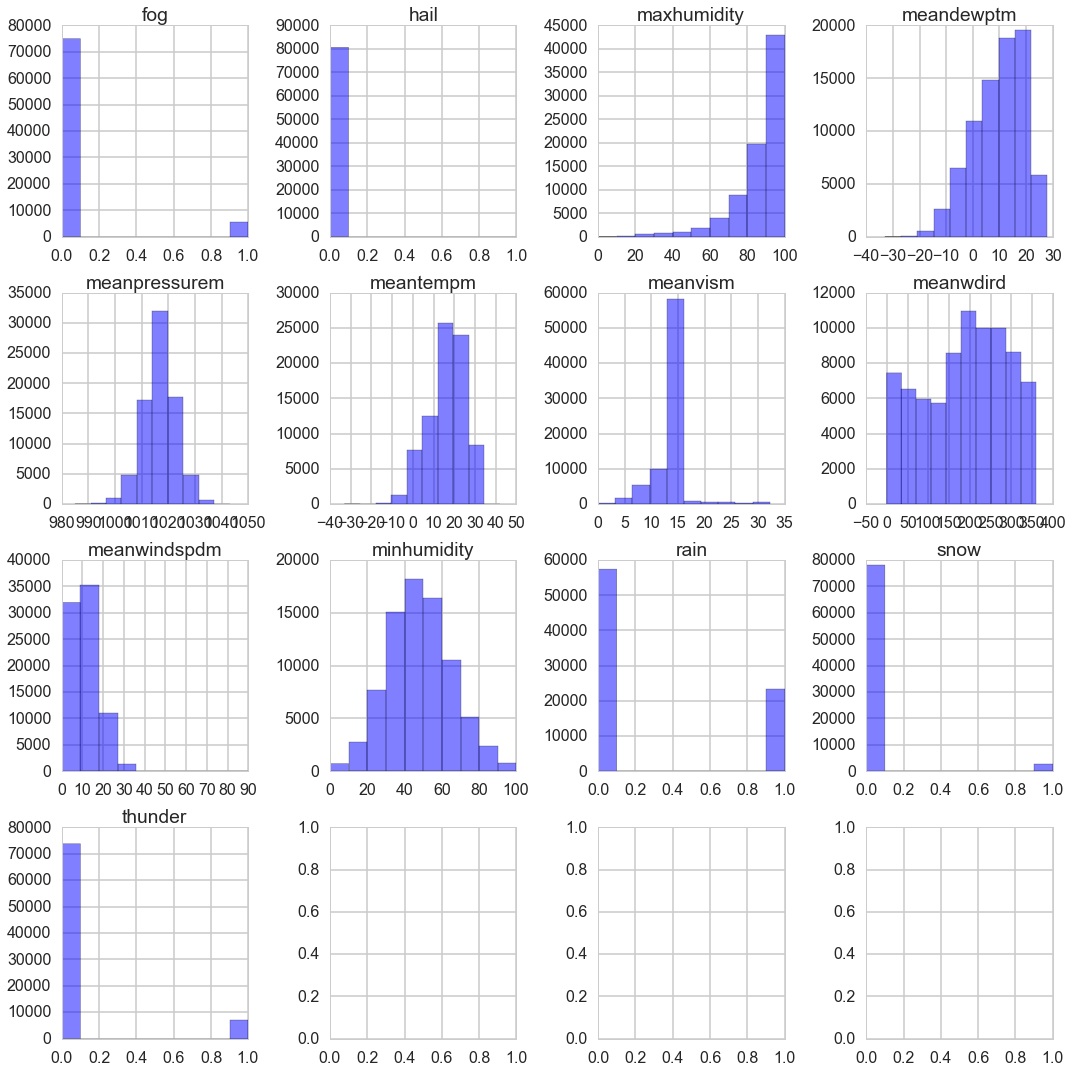

In [25]:
f1, ax1 = plt.subplots(4,4, figsize=(15,15), tight_layout=True)
for j, col in enumerate(weather_df1.columns[2:]):
    axis = ax1[j / 4][j % 4] # iterator to loop through plots
    # plot histogram for each indicator variable, separating each bar by response status
    axis.hist(weather_df1[col].dropna(), alpha=.5, color='b')
    axis.set_title(weather_df1[col].name)
    axis.legend()

In [3]:
pages = {}
years1 = [str(i) for i in range(1998,2016)]
years2 = [str(i) for i in range(2006,2016)]
track_year_dict = {"_Kentucky_Derby": years1, "_Preakness_Stakes": years1, "_Belmont_Stakes": years2}

for key in track_year_dict.keys():
    for year in track_year_dict[key]:
        pages[year+key] = requests.get("https://en.wikipedia.org/wiki/{}".format(year+key)).text
        time.sleep(0.1)

In [61]:
def parser(key, page_dict):
    soup = BeautifulSoup(page_dict[key], "html.parser")
    tables = soup.find_all("table", attrs={"class": "wikitable"})
    
    if len(tables[0].find_all("tr")) <= 5:
        table1 = tables[0].find_all("tr")
        table2 = tables[1].find_all("tr")
    else:
        table1 = tables[1].find_all("tr")
        table2 = tables[0].find_all("tr")
    
    t1headers = [elem.get_text() for elem in table1[0].find_all("th")]
    t2headers = [elem.get_text() for elem in table2[0].find_all("th")]
    if key == "2005_Kentucky_Derby":
        t2headers.append("Time")
        t2headers[t2headers.index("Jockey")] = "Horse"
    
    t1 = []
    t2 = []
    for row1 in table1[1:]:
        r1_data = [cell.get_text() for cell in row1.find_all("td")]
        t1.append(r1_data)
    for row2 in table2[1:]:
        if (len(row2.find_all("td")) == 6) and (row2.find("th")):
            r2_data = [cell.get_text() for cell in row2.find_all("td")]
            r2_data.insert(2, row2.find("th").get_text())
            t2.append(r2_data)
        else:
            r2_data = [cell.get_text() for cell in row2.find_all("td")]
            t2.append(r2_data)       
    try:
        payout = pd.DataFrame(t1, columns=t1headers)
        results = pd.DataFrame(t2, columns=t2headers)
    except Exception,e:
        print key
        #if not t1headers:
        if key == "2015_Kentucky_Derby":
            t1headers = [elem.get_text() for elem in table1[0].find_all("td")]
            payout = pd.DataFrame(t1, columns=t1headers)
            results = pd.DataFrame(t2, columns=t2headers)
        else:
            print str(e)
  
    return (payout, results)

In [89]:
bigdict = {key:parser(key, pages) for key in pages.keys()}

2015_Kentucky_Derby


In [90]:
payouts_df = pd.DataFrame(columns=["Post", "Horse", "Win", "Place", "Show", "Track", "Year"])
for track in track_year_dict.keys():
    for year in track_year_dict[track]:
        access = year+track
        bigdict[access][0].columns = ["Post", "Horse", "Win", "Place", "Show"]
        bigdict[access][0]["Track"] = track
        bigdict[access][0]["Year"] = year
        payouts_df = pd.concat([payouts_df, bigdict[access][0]], ignore_index = True)

In [91]:
payouts_df.head()

,Post,Horse,Win,Place,Show,Track,Year
0,11,Real Quiet,$7.00,$3.60,$3.00,_Preakness_Stakes,1998
1,10,Victory Gallop,-,$3.20,$2.80,_Preakness_Stakes,1998
2,3,Classic Cat,-,-,$4.80,_Preakness_Stakes,1998
3,6,Charismatic,$18.80,$7.60,$5.80,_Preakness_Stakes,1999
4,5,Menifee,-,$3.60,$3.20,_Preakness_Stakes,1999


In [103]:
def any_in(my_list, comp_list):
    ret_list = []
    for item in my_list:
        if item in comp_list:
            ret_list.append(item)
    return ret_list

def dropper(df, my_list):
    drops = any_in(my_list, df.columns)
    df.drop(drops, axis=1, inplace=True)
    return df

def renamer(df, old_names, new_name):
    if any_in(old_names, df.columns):
        rename = any_in(old_names, df.columns)[0]
        newcolnms = list(df.columns)
        index = newcolnms.index(rename)
        newcolnms[index] = new_name
        df.columns = newcolnms
    
    
drop_list = ["Trainer", "Jockey", "Owner", "Lengths\nBehind", "Time / behind", "Time/\nBehind", 
             "Trainer\n\n", "Points[7]", "Points", "Previous Race", "Time"]
Horse = ["Horse name"]
Finish = ["Finish\nPosition", "Finish[2]", "Results", "Finished", "Position", "Finish\nposition", "Finish"]
Post = ["Post\nPosition", "Number", "Program\nNumber", "Post\nposition", "Pgm", "Post"]
Stakes = ["Stake", "Purse\nEarnings", "Stakes"]
MOdds = ["Morning Line\nOdds", "Morning\nline\nodds", "Opening odds (to 1)", "Opening Odds", "Morning\nodds[3]",
        "Morning Line Odds", "Morning Line\nodds", "Morning\nOdds[3]", "Opening\nOdds"]
POdds = ["Final\nodds[1]", "Post Time\nOdds", "Final odds[4]", "Post Time\nodds", "Final Odds", "Final Odds[2]",
        "Final odds", "Final odds\nto $1[1]", "Odds"]

for k in bigdict.keys():
    dropper(bigdict[k][1], drop_list)
    renamer(bigdict[k][1], Horse, "Horse")
    renamer(bigdict[k][1], Finish, "Finish")
    renamer(bigdict[k][1], Post, "Post")
    renamer(bigdict[k][1], Stakes, "Stakes")
    renamer(bigdict[k][1], MOdds, "Morning Line Odds")
    renamer(bigdict[k][1], POdds, "Post Time Odds")

In [104]:
results_df = pd.DataFrame(columns=["Track", "Year", "Finish", "Post", "Horse", "Morning Line Odds", "Post Time Odds", "Stakes"])
for track in track_year_dict.keys():
    for year in track_year_dict[track]:
        access = year+track
        bigdict[access][1]['Track'] = track
        bigdict[access][1]['Year'] = year
        results_df = pd.concat([results_df, bigdict[access][1]], ignore_index = True)

In [105]:
results_df

,Finish,Horse,Morning Line Odds,Post,Post Time Odds,Stakes,Track,Year
0,1st,Real Quiet,NaN,11,2.50-1,"$650,000",_Preakness_Stakes,1998
1,2nd,Victory Gallop,NaN,10,2.00-1\nfavorite,"$200,000",_Preakness_Stakes,1998
2,3rd,Classic Cat,NaN,3,12.30-1,"$100,000",_Preakness_Stakes,1998
3,4th,Hot Wells,NaN,7,25.20-1,"$50,000",_Preakness_Stakes,1998
4,5th,Black Cash,NaN,2,7.10-1,,_Preakness_Stakes,1998
5,6th,Spartan Cat,NaN,1,98.80-1,,_Preakness_Stakes,1998
6,7th,Baquero,NaN,6,14.60-1,,_Preakness_Stakes,1998
7,8th,Basic Trainee,NaN,5,63.80-1,,_Preakness_Stakes,1998
8,9th,Cape Town,NaN,4,2.90-1,,_Preakness_Stakes,1998
9,10th,Silver's Prospect,NaN,8,98.00-1,,_Preakness_Stakes,1998


In [56]:
url = "http://www.ncdc.noaa.gov/cdo-web/api/v2/data"
querystring = {"datasetid":"GHCND","locationid":"ZIP:71111","startdate":"2010-05-01","enddate":"2010-05-01"}
headers = {"token": "CGGFJuGumVuKGnDfDyYdkDmmeTcMzIOr","cache-control": "no-cache","postman-token": "2c03d9cf-3d0d-0582-faa8-a5b369dfa568"}
response = requests.request("GET", url, headers=headers, params=querystring)
json.loads(response.text)

{u'metadata': {u'resultset': {u'count': 2, u'limit': 25, u'offset': 1}},
 u'results': [{u'attributes': u',,N,',
   u'datatype': u'PRCP',
   u'date': u'2010-05-01T00:00:00',
   u'station': u'GHCND:US1LABS0001',
   u'value': 10},
  {u'attributes': u',,N,',
   u'datatype': u'PRCP',
   u'date': u'2010-05-01T00:00:00',
   u'station': u'GHCND:US1LABS0003',
   u'value': 13}]}